In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv(r"C:\Users\lokit\Downloads\adult.csv")

In [85]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [86]:
# We can observe that in the adult dataset there are missing values given by ?.

In [87]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [88]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [89]:
df.shape

(48842, 15)

In [90]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [91]:
# we can see that workclass contains 2799 missing values
# occupation 2809
#native country 857

In [92]:
#replacing missing values(?) with null values

In [93]:
df.replace('?',np.NaN,inplace=True)

In [94]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [95]:
#we can observe the missing values getting reflected,with isnull method

In [96]:
# Finding the percentage of missing values

In [97]:
(df['workclass'].isnull().sum()/len(df))*100

5.7307235575938735

In [98]:
(df['occupation'].isnull().sum()/len(df))*100

5.751197739650301

In [99]:
(df['native-country'].isnull().sum()/len(df))*100

1.7546374022357807

In [100]:
# As the percentage of missing values are nearly 5% we drop the missing values

In [101]:
df.dropna(inplace=True)

In [102]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [103]:
df.shape

(45222, 15)

In [104]:
# ALl the rows having missing values are dropped

In [105]:
num_f = df.select_dtypes(include='int64')

In [106]:
num_f

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
5,34,198693,6,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


EDA

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

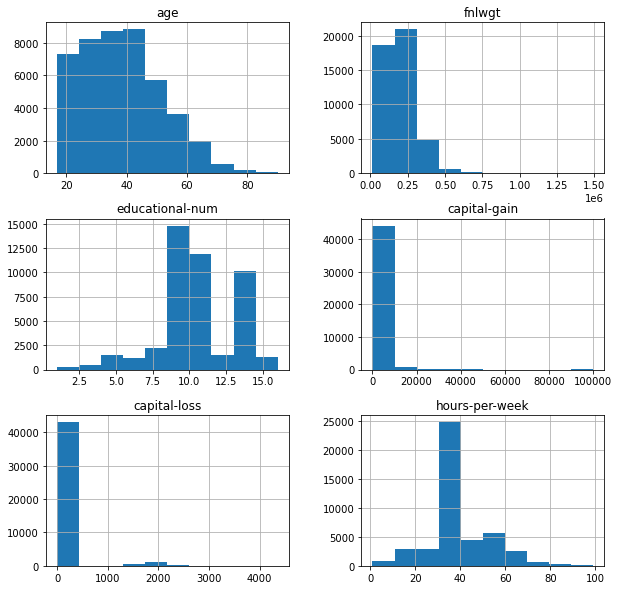

In [107]:
num_f.hist(figsize=(10,10))

In [108]:
#Most of the people are of age group 20-45
#There are very few people who have capital gain and capital loss
#The most common working hours per week is 40
#educational-num have high values in the range 8-11 and 13-15
#More number of people have fnlwt values between 0-0.25

In [109]:
df['native-country'].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [110]:
#Majority are from United States

In [111]:
df['race'].value_counts()

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [112]:
#majority of the people belong to White race followed by Black

In [113]:
df['relationship'].value_counts()

Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64

In [114]:
#Husband relationship looks dominant followed by Not-in-Family

In [115]:
df['gender'].value_counts()

Male      30527
Female    14695
Name: gender, dtype: int64

Male      0.675048
Female    0.324952
Name: gender, dtype: float64

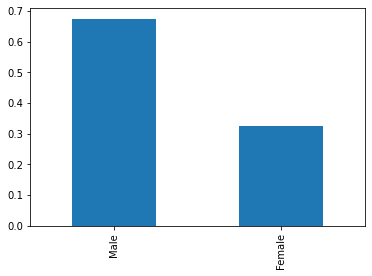

In [116]:
df['gender'].value_counts(normalize=True).plot(kind='bar')
df['gender'].value_counts(normalize=True)

In [117]:
#There are more number of males compared to females

In [118]:
df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

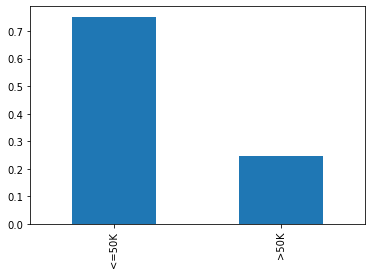

In [119]:
df['income'].value_counts(normalize=True).plot(kind='bar')
df['income'].value_counts(normalize=True)

In [120]:
# Income <=50k counts for 75% while >50k counts for 25% 
# most people earn less than or equal to 50k


<AxesSubplot:xlabel='income', ylabel='count'>

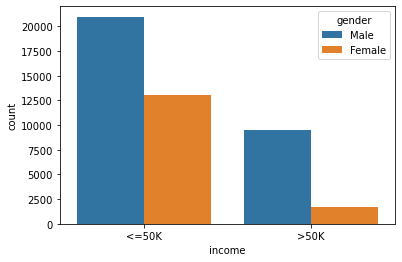

In [121]:
sns.countplot(x='income',hue='gender',data=df)

In [122]:
# Males are dominant in both income groups

<AxesSubplot:xlabel='workclass', ylabel='count'>

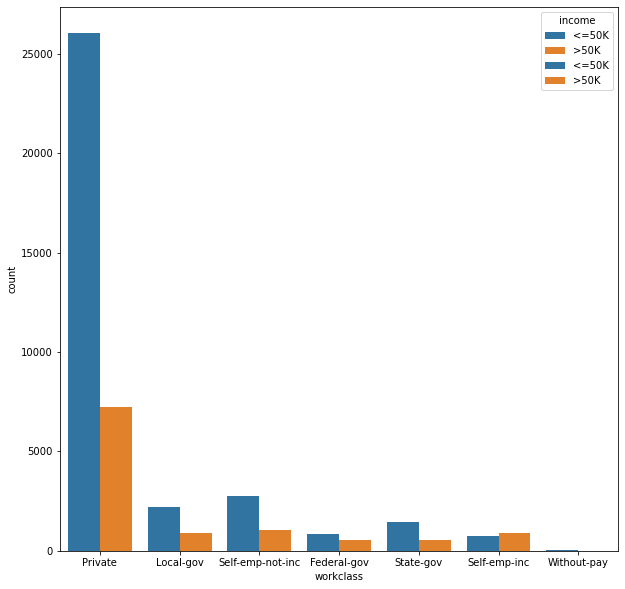

In [123]:
plt.figure(figsize=(10,10))
sns.countplot(x='workclass',hue='income',data=df)
sns.countplot(x='workclass',hue='income',data=df)

In [124]:
#Maximum number of people earning <=50k as well as >=50k are from private sector followed by  self emp-not-inc

<AxesSubplot:xlabel='count', ylabel='occupation'>

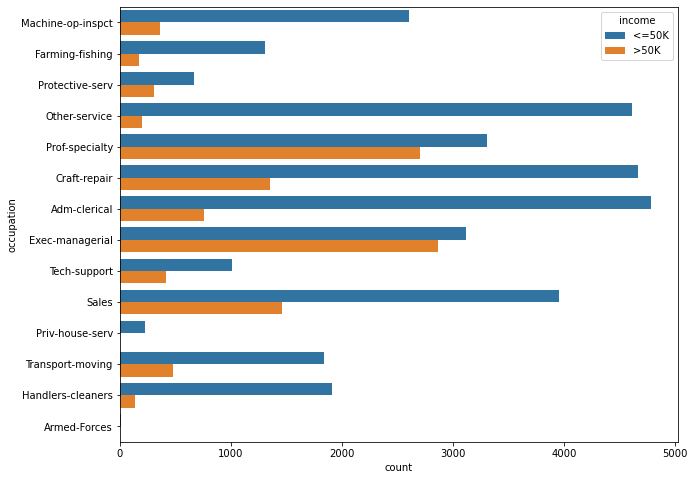

In [125]:
plt.figure(figsize=(10,8))
sns.countplot(y='occupation',hue='income',data=df)

In [126]:
#people belonging to occupations like other-service, Craft repair,Adm-clerical,Pof-specialtiy are majority having income <=50k
#while minimum belongs to Priv-house serv

#Maximum people whose salary is >50k belong to occupations like Exec-managerial,Prof-speciality,sales

<AxesSubplot:xlabel='count', ylabel='education'>

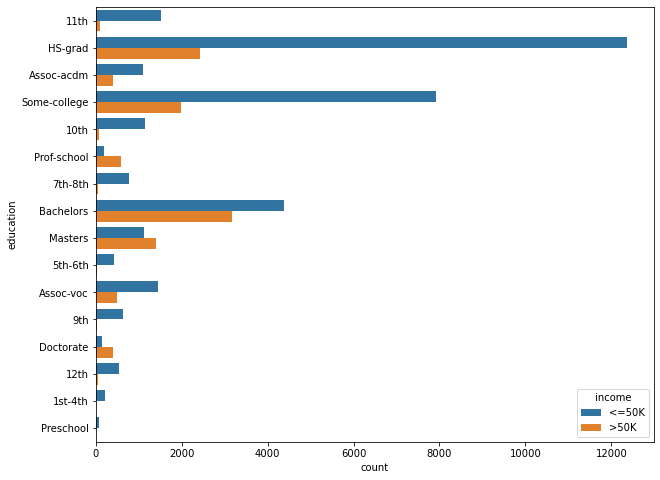

In [127]:
plt.figure(figsize=(10,8))
sns.countplot(y='education',hue='income',data=df)

In [128]:
#most people earning less than 50k have education ~HS-grad while >50k ~ Bachelors

<AxesSubplot:xlabel='count', ylabel='marital-status'>

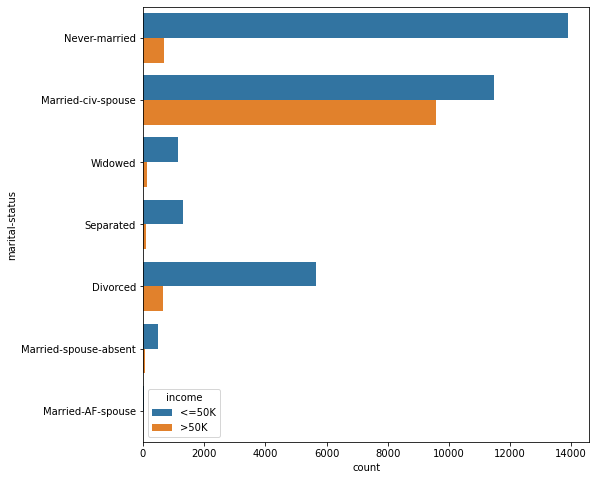

In [129]:
plt.figure(figsize=(8,8))
sns.countplot(y='marital-status',hue='income',data=df)

In [130]:
# More people whose income is<=50k belong to categories of never married and Married-civ-spouse
##People whose income is >50k have their marital staus as married-civ-spouse.

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

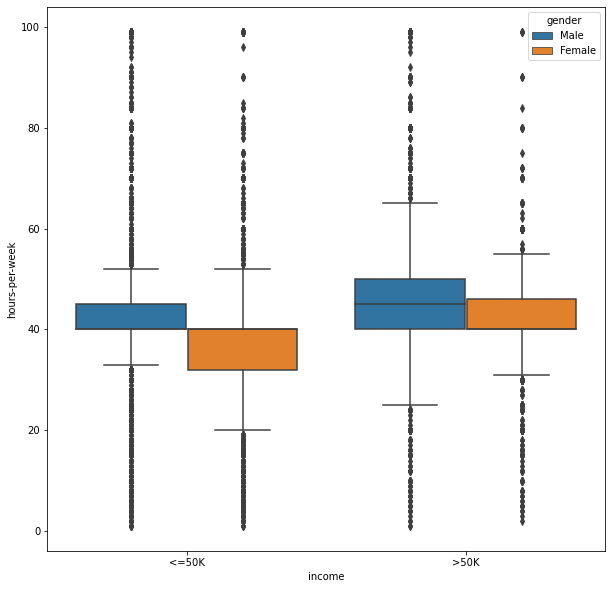

In [131]:

plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='hours-per-week',hue='gender',data=df)

In [132]:
#There are a lot of outliers in hours-per-week for both males and females
# Males worked few more hours per week than females for both the income groups(>50k,<=50k).

<AxesSubplot:xlabel='income', ylabel='age'>

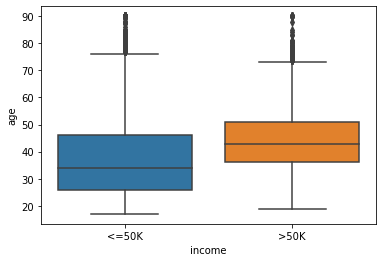

In [133]:
sns.boxplot(x='income',y='age',data=df)

In [134]:
# Many people having income <=50k belong to age group 25-45 with a median age of 33
#Many people having income >50k tend to be older thaan <=50k income group, having age falling between 38-50 with median age of 45

Removing outliers and data preparation

In [135]:
df.drop(['fnlwgt','education'],axis=1,inplace=True)

In [136]:
df['capital-gain'].value_counts()*100/len(df)

0        91.619123
15024     1.101234
7688      0.864623
7298      0.776171
99999     0.506391
           ...    
22040     0.002211
1731      0.002211
7262      0.002211
1639      0.002211
2387      0.002211
Name: capital-gain, Length: 121, dtype: float64

In [137]:
df['capital-loss'].value_counts()*100/len(df)

0       95.267790
1902     0.650126
1977     0.543983
1887     0.504179
2415     0.150369
          ...    
419      0.002211
155      0.002211
1539     0.002211
2201     0.002211
1421     0.002211
Name: capital-loss, Length: 97, dtype: float64

In [138]:
# As 91.6% values are 0 for capital gain we drop the column
# As 95% values are 0 for capital loss we drop the column

In [139]:
df.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

In [140]:
df.drop(df[df['age']>=80].index,axis=0,inplace=True)

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [144]:
from sklearn.model_selection import train_test_splitain_test_split

In [153]:
x = df.drop(['income'],axis=1)
y = df['income']

In [155]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [158]:
num_col = x_train.select_dtypes(include='int64')

In [159]:
cat_col = x_train.select_dtypes(include='object')

In [160]:
scaler = StandardScaler()
df_n = pd.DataFrame(scaler.fit_transform(num_col),columns= num_col.columns)

In [164]:
coded = OneHotEncoder(drop='first',sparse=False)
df_c = pd.DataFrame(coded.fit_transform(cat_col),columns=coded.get_feature_names_out(cat_col.columns))

In [165]:
x_train_ = pd.concat([df_n,df_c],axis=1)

In [167]:
x_test_num = x_test.select_dtypes(include='int64')
df_xt_n = pd.DataFrame(scaler.transform(x_test_num),columns=x_test_num.columns)

In [170]:
x_test_cat = x_test.select_dtypes(include='object')
df_xt_c = pd.DataFrame(coded.transform(x_test_cat),columns=coded.get_feature_names_out(x_test_cat.columns))

In [185]:
x_test_ = pd.concat([df_xt_n,df_xt_c],axis=1)

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [182]:
lr = LogisticRegression(max_iter=400)

In [183]:
lr.fit(x_train_,y_train)

LogisticRegression(max_iter=400)

In [186]:
y_pred = lr.predict(x_test_)

In [187]:
metrics.accuracy_score(y_test,y_pred)

0.8264418811002662

In [189]:
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.89      8481
        >50K       0.68      0.56      0.62      2789

    accuracy                           0.83     11270
   macro avg       0.77      0.74      0.75     11270
weighted avg       0.82      0.83      0.82     11270



C:\Users\lokit\anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


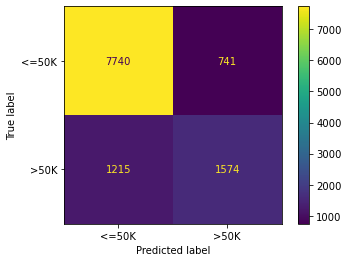

In [194]:
metrics.plot_confusion_matrix(lr,x_test_,y_test)

In [198]:
prob = lr.predict_proba(x_test_)
prob = prob[:,1]
roc_auc=metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.8794567858832277


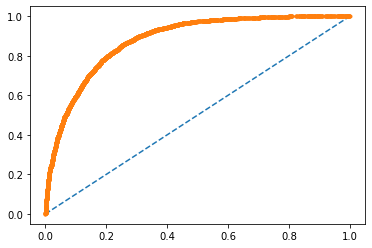

In [212]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,prob,pos_label='>50K')

plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


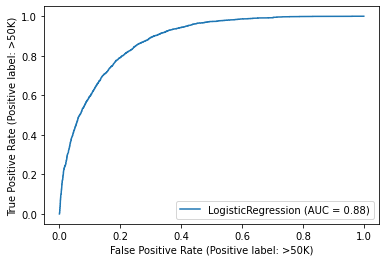

In [213]:
metrics.plot_roc_curve(lr,x_test_,y_test)

In [214]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15,random_state=0)
x_train_pca = pca.fit_transform(x_train_)

In [215]:
x_test_pca = pca.transform(x_test_)

In [216]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [252]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [245]:
from sklearn.neighbors import KNeighborsClassifier

In [217]:
lr  = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(probability=True)

In [253]:
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gb= GradientBoostingClassifier()

In [254]:
classifiers = ['LogisticRegression','DecisionTreeClassifier','SVC','RandomForestClassifier','KNeighborsClassifier','GradientBoostingClassifier']

In [255]:
models = {lr:'LogisticRegression',
         dt:'DecisionTreeClassifier',
         svm:'SVC',
         rf:'RandomForestClassifier',
         knn:'KNeighborsClassifier',
         gb :'GradientBoostingClassifier'}

In [256]:
def train(algo,name,x_train_pca,y_train,x_test_pca,y_test):
    algo.fit(x_train_pca,y_train)
    y_pred_pca = algo.predict(x_test_pca) 
    return y_pred_pca

def performance(algo,name,x_test_pca,y_test,y_pred_pca):
    acc_score = metrics.accuracy_score(y_test,y_pred_pca)
    print('Accuracy score',name,':', acc_score)
    
    sns.heatmap(metrics.confusion_matrix(y_test,y_pred_pca),annot=True)
    plt.title('Confusion Matrix')
    plt.show()
    print(metrics.classification_report(y_test,y_pred_pca))
    
    prob_pca = algo.predict_proba(x_test_pca)
    prob_pca = prob_pca[:,1]
    roc_auc_pca = metrics.roc_auc_score(y_test,prob_pca)
    print(roc_auc_pca)
    
    
    fpr_pca,tpr_pca,thresholds_pca = metrics.roc_curve(y_test,prob_pca,pos_label='>50K')
    plt.plot([0,1],[0,1],linestyle='--')
    plt.plot(fpr_pca,tpr_pca,marker='.')
    plt.show()
    
    return roc_auc_pca


def main(models):
    auc=[]
    for algo,name in models.items():
        print('#'*40,name,'#'*40)
        y_pred_pca = train(algo,name,x_train_pca,y_train,x_test_pca,y_test)
        roc_auc_pca = performance(algo, name, x_test_pca, y_test, y_pred_pca)
        auc.append(roc_auc_pca)
    return auc
    
    
    

######################################## LogisticRegression ########################################
Accuracy score LogisticRegression : 0.8212954747116238


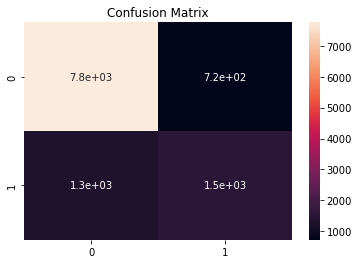

              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.89      8481
        >50K       0.67      0.54      0.60      2789

    accuracy                           0.82     11270
   macro avg       0.77      0.73      0.74     11270
weighted avg       0.81      0.82      0.81     11270

0.8731677401437562


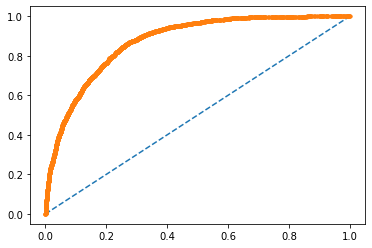

######################################## DecisionTreeClassifier ########################################
Accuracy score DecisionTreeClassifier : 0.7755102040816326


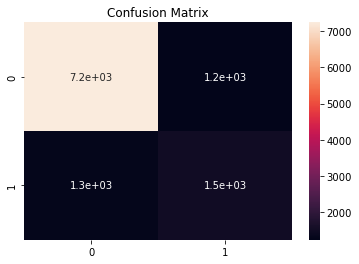

              precision    recall  f1-score   support

       <=50K       0.85      0.85      0.85      8481
        >50K       0.55      0.54      0.54      2789

    accuracy                           0.78     11270
   macro avg       0.70      0.70      0.70     11270
weighted avg       0.77      0.78      0.77     11270

0.7234466142000326


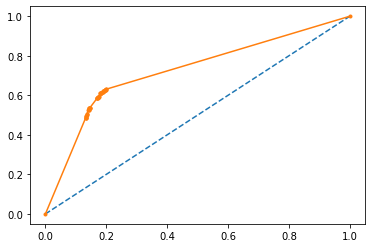

######################################## SVC ########################################
Accuracy score SVC : 0.8291038154392192


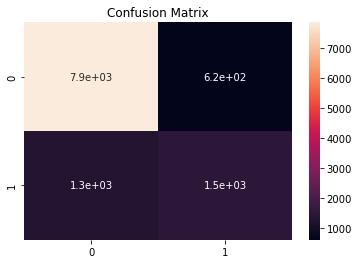

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      8481
        >50K       0.71      0.53      0.61      2789

    accuracy                           0.83     11270
   macro avg       0.78      0.73      0.75     11270
weighted avg       0.82      0.83      0.82     11270

0.8524948454793747


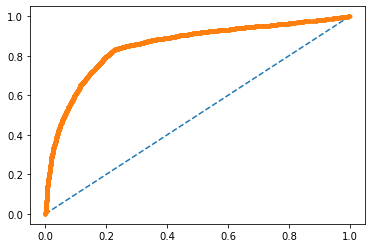

######################################## RandomForestClassifier ########################################
Accuracy score RandomForestClassifier : 0.8141969831410826


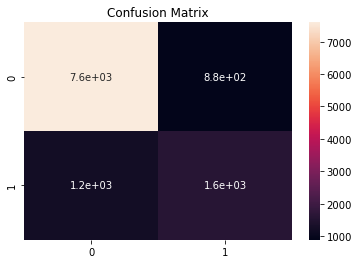

              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      8481
        >50K       0.64      0.57      0.60      2789

    accuracy                           0.81     11270
   macro avg       0.75      0.73      0.74     11270
weighted avg       0.81      0.81      0.81     11270

0.8610475299880453


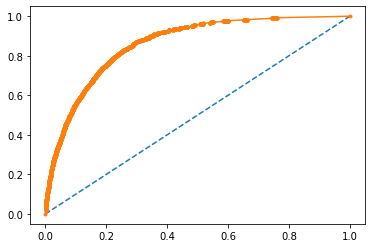

######################################## KNeighborsClassifier ########################################
Accuracy score KNeighborsClassifier : 0.8130434782608695


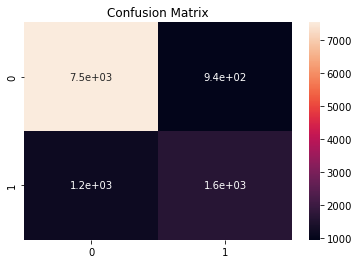

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      8481
        >50K       0.63      0.58      0.61      2789

    accuracy                           0.81     11270
   macro avg       0.75      0.74      0.74     11270
weighted avg       0.81      0.81      0.81     11270

0.8362704662551337


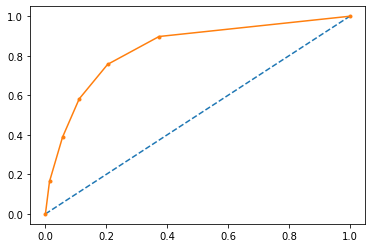

######################################## GradientBoostingClassifier ########################################
Accuracy score GradientBoostingClassifier : 0.8255545696539486


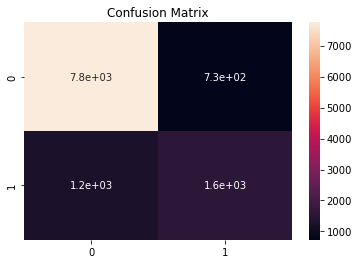

              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.89      8481
        >50K       0.68      0.56      0.61      2789

    accuracy                           0.83     11270
   macro avg       0.77      0.74      0.75     11270
weighted avg       0.82      0.83      0.82     11270

0.881756191015887


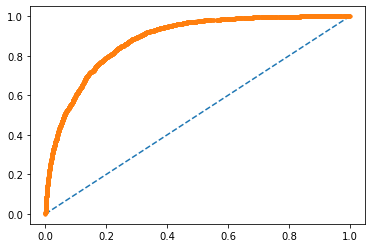

In [257]:
auc = main(models)

In [258]:
model_comp_df = pd.DataFrame(auc, columns = ['ROC AUC'], index = classifiers)

model_comp_df

,ROC AUC
LogisticRegression,0.873168
DecisionTreeClassifier,0.723447
SVC,0.852495
RandomForestClassifier,0.861048
KNeighborsClassifier,0.836270
GradientBoostingClassifier,0.881756
